## Importing the necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

## Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving smartphone.csv to smartphone (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['smartphone.csv']))

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head(5)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# Data Analysis

### Count of each Person doing each Activity

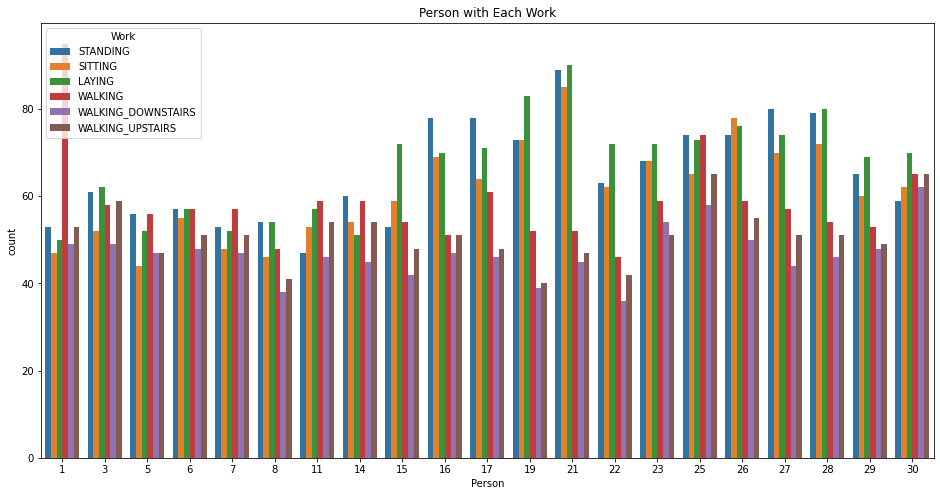

In [4]:
plt.figure(figsize = (16,8))
plt.title("Person with Each Work")
sns.countplot(hue = 'Work', x='Person',data = data);
plt.show()

### Count of people doing different activities

c:\users\suchika\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


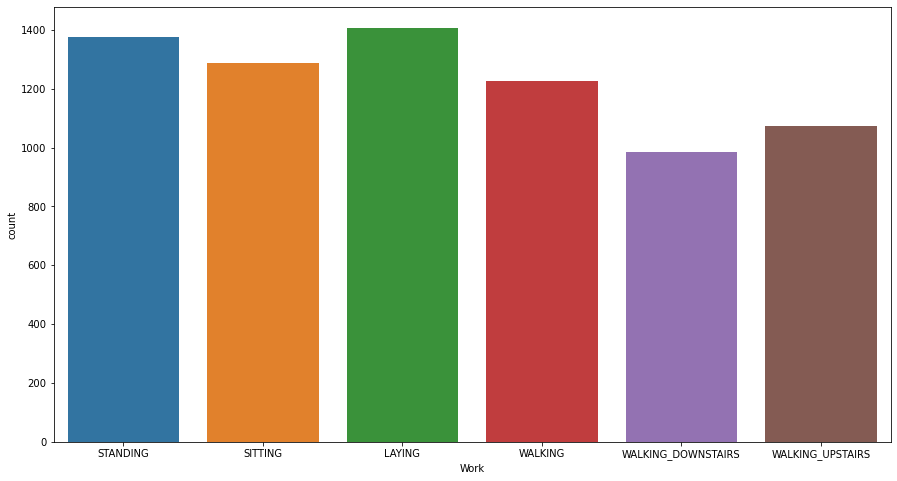

In [5]:
plt.figure(figsize=(15,8))
sns.countplot(data['Work'])
plt.show()

 Observation:-Count of Persons doing what type of activity


### Percentage of people doing different activities

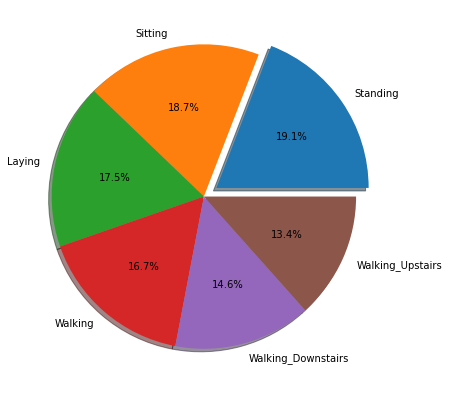

In [6]:
plt.figure(figsize=(18,7))
explode = (0.1, 0, 0, 0,0,0)
plt.pie(data.Work.value_counts(),explode=explode,labels=['Standing','Sitting','Laying','Walking','Walking_Downstairs','Walking_Upstairs'],autopct='%1.1f%%',shadow=True)
plt.show()

### Different devices used

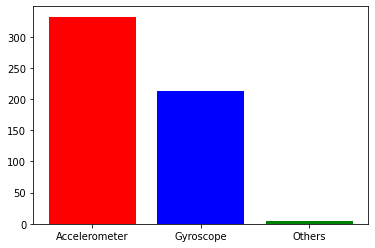

In [7]:
acc = 0
gyro = 0
others = 0
for column in data.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

# Show bar plot for the three types
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))
plt.show()


### Heatmap for top 10 features

In [8]:
df=data.iloc[:,1:10]
df

,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X
0,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724
1,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068
2,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692
3,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692
4,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469
...,...,...,...,...,...,...,...,...,...
7347,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795
7348,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440
7349,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999
7350,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702


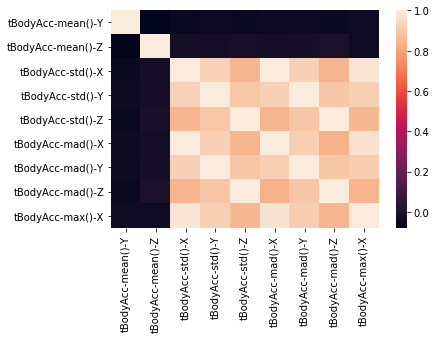

In [9]:
sns.heatmap(df.corr())

### Insights: From heatmap we can conclude that tBodyAcc-mean()-Y and tBodyAcc-mean()-Z are not corelated features.Other Features are highly corelated.

## Boxplots and Scatter plots for visualization

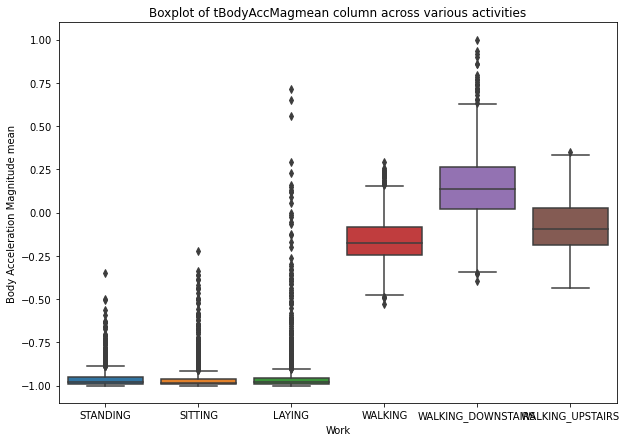

In [8]:

plt.figure(figsize = (10,7))
sns.boxplot(x = 'Work', y ='tBodyAccMag-mean()', data = data);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMagmean column across various activities')
plt.show()

**Insights:-It shows that if body accceleration mean is less than (-0.50) then it is static activity  else it is moving activity.**

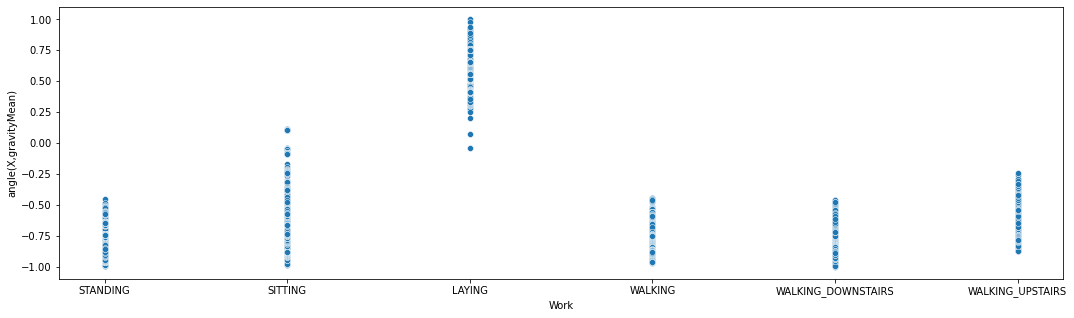

In [9]:
plt.figure(figsize=(18,5))
sns.scatterplot(x=data['Work'],y=data['angle(X,gravityMean)'])
plt.show()

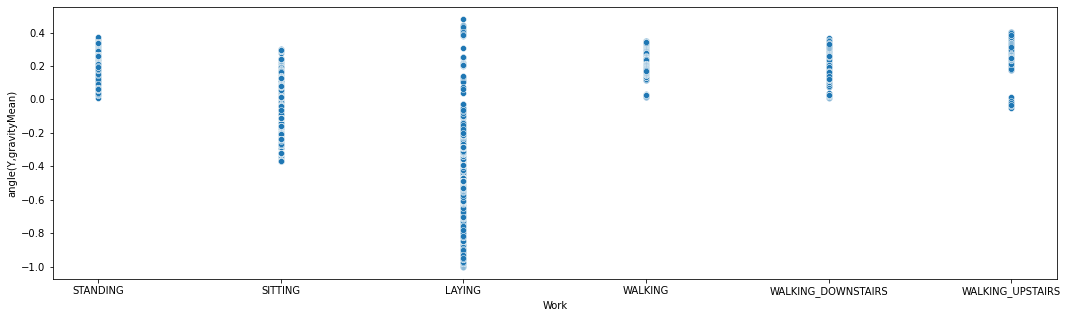

In [10]:
plt.figure(figsize=(18,5))
sns.scatterplot(x=data['Work'],y=data['angle(Y,gravityMean)'])
plt.show()

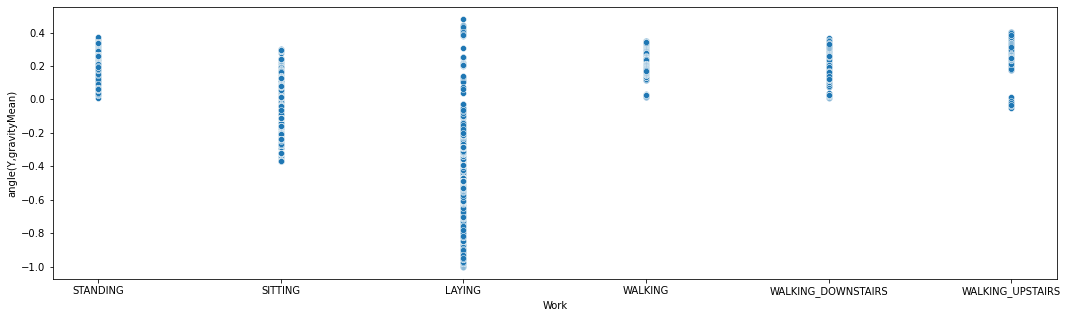

In [11]:
plt.figure(figsize=(18,5))
sns.scatterplot(x=data['Work'],y=data['angle(Y,gravityMean)'])
plt.show()

### From the above scatterplots we came to know that Laying activity is the most different activity.

In [13]:
#Reading data from train.csv
Data=pd.read_csv("train.csv")
Data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## Checking for NULL Values

In [14]:
#Checking null values count
Data.isna().sum().sum()

0

## Label Encoding

In [15]:
#Encoing the lebels
le = LabelEncoder()
Data['Work'] = le.fit_transform(Data.Work)
Data['Work'].sample(10)

3625    2
3613    2
7087    3
4710    2
805     4
4386    2
6504    1
6972    2
896     0
4249    1
Name: Work, dtype: int32

In [16]:
#Shuffling the data
Data=Data.sample(frac=1)
Data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
1399,0.258723,-0.047533,-0.187616,-0.440420,-0.269058,0.067441,-0.459241,-0.301043,0.059487,-0.364085,...,-0.583959,-0.108930,0.691768,-0.745720,0.157957,-0.687243,0.172509,0.229187,7,3
2571,0.284256,-0.049886,-0.195765,-0.979544,-0.889374,-0.861336,-0.981286,-0.875178,-0.837461,-0.927202,...,-0.787254,0.271126,-0.324476,0.077134,-0.091175,-0.458243,-0.231866,-0.158737,15,1
5723,0.276088,-0.016953,-0.108417,-0.997114,-0.995177,-0.990885,-0.997494,-0.994681,-0.992822,-0.940820,...,-0.819303,0.552497,0.244903,0.094979,0.053638,-0.487796,-0.170015,-0.214811,26,1
4290,0.251018,-0.019943,-0.098149,-0.948680,-0.980328,-0.967347,-0.950448,-0.980060,-0.966090,-0.894618,...,-0.734583,-0.063626,0.093508,0.365330,0.518684,0.410145,-0.363656,-0.625041,21,0
724,0.277869,-0.017912,-0.103397,-0.971662,-0.927909,-0.916082,-0.977909,-0.934935,-0.914791,-0.911177,...,0.181281,-0.103569,0.084655,0.101314,0.860623,-0.358412,-0.290544,-0.186717,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,0.271294,-0.017966,-0.106485,-0.994543,-0.994835,-0.988547,-0.994933,-0.994267,-0.988508,-0.943002,...,-0.755753,-0.068571,0.097635,-0.425510,0.230776,0.622740,-0.438209,-0.570742,19,0
6446,0.240493,-0.015463,-0.166749,-0.269328,-0.189449,-0.315729,-0.339075,-0.235656,-0.401860,0.156947,...,-0.412089,0.084399,0.487734,-0.879074,-0.223554,-0.596121,0.310883,0.200090,28,5
6325,0.278908,-0.010981,-0.115776,-0.983195,-0.952500,-0.972034,-0.986342,-0.954082,-0.971219,-0.923018,...,-0.228905,0.040928,-0.381537,0.085603,-0.739396,-0.778265,0.242391,0.071149,28,1
342,0.259949,-0.022680,-0.102276,-0.005766,0.092542,-0.253922,-0.089790,0.047677,-0.260533,0.471498,...,-0.722046,0.400129,0.832624,0.927989,-0.927624,-0.701330,0.287767,0.100701,1,4


## Allocating features and targets

In [19]:
#Allocating train features and targets
Train_features=Data.iloc[:,:-1].copy()
Train_targets=Data['Work'].copy()

## Correlation Filter

In [20]:
#High correlation filter
cor_matrix = Train_features.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Number of High correlation features:",len(to_drop))

Number of High correlation features: 302


## Applying correlation filter to data

In [21]:
#Applying High correlation filter

Train_features_reduced = Train_features.drop(to_drop, axis=1)
print("Shape after applying quasi constant filter :",Train_features_reduced.shape)

Shape after applying quasi constant filter : (7352, 247)


## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
#Training the Model without feature reduction
model=RandomForestClassifier(n_estimators=700)
model.fit(Train_features,Train_targets)

#Training the model with reduced features
model_reduced=RandomForestClassifier(n_estimators=700)
model_reduced.fit(Train_features_reduced,Train_targets)

RandomForestClassifier(n_estimators=700)

### Importing test files

In [25]:
#Importing test file
Test_Data=pd.read_csv("test.csv")
Test_Data['Work']=le.transform(Test_Data['Work'])
Test_features=Test_Data.iloc[:,:-1].copy()
Test_targets=Test_Data['Work'].copy()

#Applying correlation filter to test data
Test_features_reduced = Test_features.drop(to_drop,axis=1)

### Evaluating the models

In [26]:
#Evaluating the models
#Calculating accuracy for model trained with all features
predict=model.predict(Test_features)
accuracy=accuracy_score(Test_targets,predict)
print("Accuracy of the Random Forest model without feature reduction : ",accuracy*100)

#Calculating accuracy of the model trained with reduced features
predict_reduced=model_reduced.predict(Test_features_reduced)
accuracy_reduced=accuracy_score(Test_targets,predict_reduced)
print("Accuracy of the Random Forest model with feature reduction : ",accuracy_reduced*100)


Accuracy of the Random Forest model without feature reduction :  92.60264675941634
Accuracy of the Random Forest model with feature reduction :  94.43501866304716


## Extra Tree Classifier 

In [27]:
#Trying Extra tree classifier model
#Model without feature reduction
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier(n_estimators=700)
et.fit(Train_features,Train_targets)

#Model with feature reduction
et_reduced=ExtraTreesClassifier(n_estimators=700)
et_reduced.fit(Train_features_reduced,Train_targets)

ExtraTreesClassifier(n_estimators=700)

### Evaluating the models

In [29]:
#Evaluating the models
#Calculating accuracy for model trained with all features
predict_et=et.predict(Test_features)
accuracy_et=accuracy_score(Test_targets,predict_et)
print("Accuracy of the Extra Tree model without feature reduction : ",accuracy*100)

#Calculating accuracy of the model trained with reduced features
predict_et_reduced=et_reduced.predict(Test_features_reduced)
accuracy_et_reduced=accuracy_score(Test_targets,predict_et_reduced)
print("Accuracy of the Extra Tree model with feature reduction : ",accuracy_et_reduced*100)


Accuracy of the Extra Tree model without feature reduction :  92.60264675941634
Accuracy of the Extra Tree model with feature reduction :  94.91007804546997


## Final Conclusion from Random Forest Classifier and Extra Tree Classifier

From the above models Extra Tree Classifier model with reduced features shows more accuracy. So that will be the good fit for the data. In the next cell confusion matrix is visualised for that model

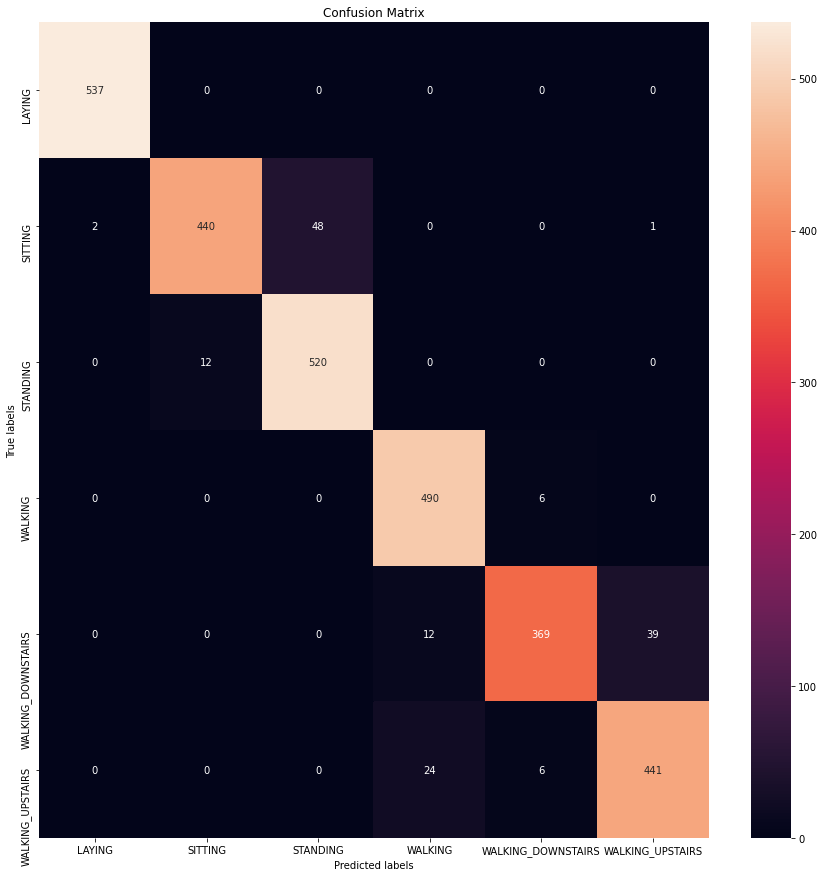

In [30]:
#Visualising Confusion matric for Extra Tree classifier trained with reduced features
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Test_targets,predict_et_reduced)

import seaborn as sns
import matplotlib.pyplot as plt  
ax=plt.figure(figsize=(15,15))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(le.classes_); ax.yaxis.set_ticklabels(le.classes_);

## SVM Classifier

In [34]:
data = pd.read_csv('train.csv', sep=',')

feature_cols = data.columns[:-1]
le = LabelEncoder()
data['Work'] = le.fit_transform(data.Work)

In [35]:
# Train data
xcol=data.columns[:-1]
ycol=data.columns[-1]

X_train = data[xcol]
y_train = data[ycol]

In [43]:
# Test Data
test = pd.read_csv("test.csv", sep=',')

test['Work']=le.transform(test.Work)

test_x_col = test.columns[:-1]
test_y_col = test.columns[-1]

X_test = test[test_x_col]
y_test = test[test_y_col]

In [44]:
# Reduced Features data
cor_matrix = X_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

Trainfred = X_train.drop(to_drop, axis=1)

In [45]:
Testfred = X_test.drop(to_drop,axis=1)

## Linear SVM

### Training the model

In [46]:
from sklearn import svm
#Training the Model without feature reduction
svc1 = svm.SVC(kernel='linear',C=1.0)
svc1.fit(X_train,y_train)

#Training the model with reduced features
svc2 = svm.SVC(kernel='linear',C=1.0)
svc2.fit(Trainfred, y_train)

SVC(kernel='linear')

### Evaluating the model

In [48]:
#Calculating accuracy for model trained with all features
pred1=svc1.predict(X_test)
acc1=svc1.score(X_test,y_test)
print("Accuracy of the Linear SVM without feature reduction : ",acc1*100)

#Calculating accuracy of the model trained with reduced features
pred2=svc2.predict(Testfred)
acc2=svc2.score(Testfred,y_test)
print("Accuracy of the Linear SVM model with feature reduction : ",acc2*100)

Accuracy of the Linear SVM without feature reduction :  96.53885307091959
Accuracy of the Linear SVM model with feature reduction :  94.43501866304716


## Gaussian SVM

### Training the model

In [50]:
from sklearn import svm
#Training the Model without feature reduction
svc3 = svm.SVC(kernel='rbf',C=10)
svc3.fit(X_train,y_train)

#Training the model with reduced features
svc4 = svm.SVC(kernel='rbf',C=10)
svc4.fit(Trainfred, y_train)

SVC(C=10)

### Evaluating the model

In [60]:
#Calculating accuracy for model trained with all features
pred3=svc3.predict(X_test)
acc3=svc3.score(X_test,y_test)
print("Accuracy of the Gaussian SVM without feature reduction : ",acc3*100)

#Calculating accuracy of the model trained with reduced features
pred4=svc4.predict(Testfred)
acc4=svc4.score(Testfred,y_test)
print("Accuracy of the Gaussian SVM model with feature reduction : ",acc4*100)

Accuracy of the Gaussian SVM without feature reduction :  94.80827960637936
Accuracy of the Gaussian SVM model with feature reduction :  92.50084832032576


## Confusion Matrix for SVM Models

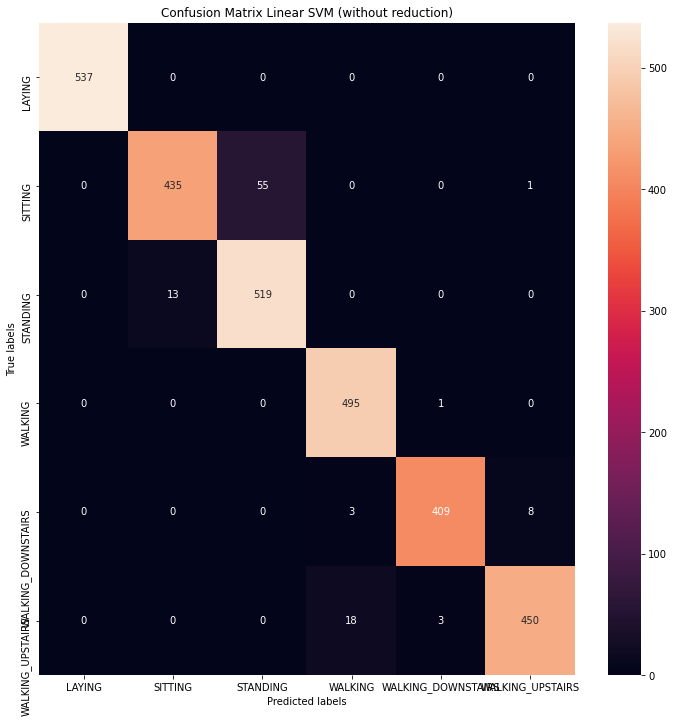

In [54]:
#Linear SVM (without reduction)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred1)
ax=plt.figure(figsize=(12,12))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Linear SVM (without reduction)'); 
ax.xaxis.set_ticklabels(le.classes_); ax.yaxis.set_ticklabels(le.classes_);

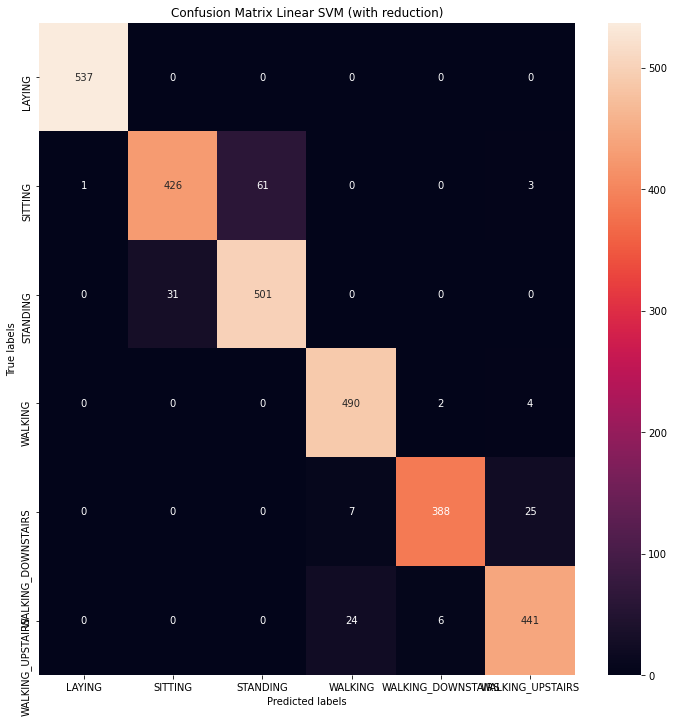

In [57]:
# Linear SVM (with reduction)
cm=confusion_matrix(y_test,pred2)
ax=plt.figure(figsize=(12,12))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Linear SVM (with reduction)'); 
ax.xaxis.set_ticklabels(le.classes_); ax.yaxis.set_ticklabels(le.classes_);

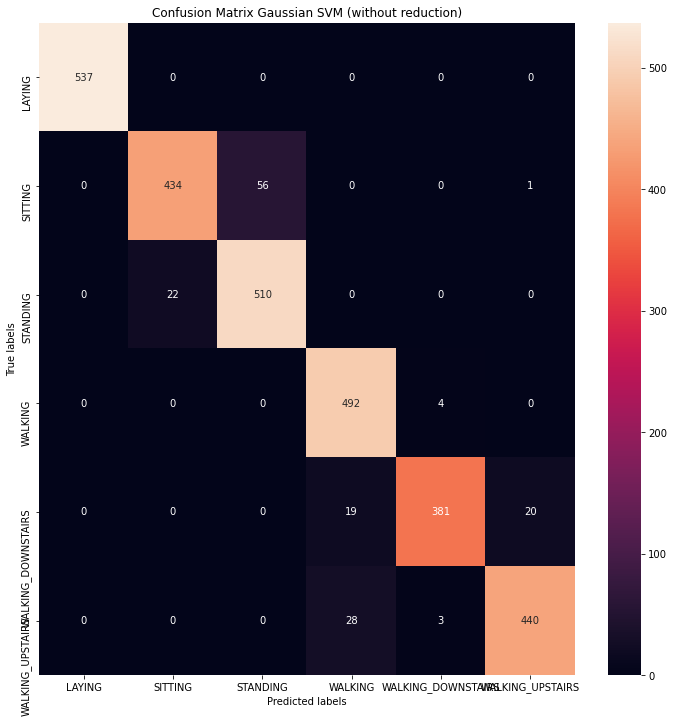

In [58]:
# Gaussian SVM (without reduction)
cm=confusion_matrix(y_test,pred3)
ax=plt.figure(figsize=(12,12))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Gaussian SVM (without reduction)'); 
ax.xaxis.set_ticklabels(le.classes_); ax.yaxis.set_ticklabels(le.classes_);

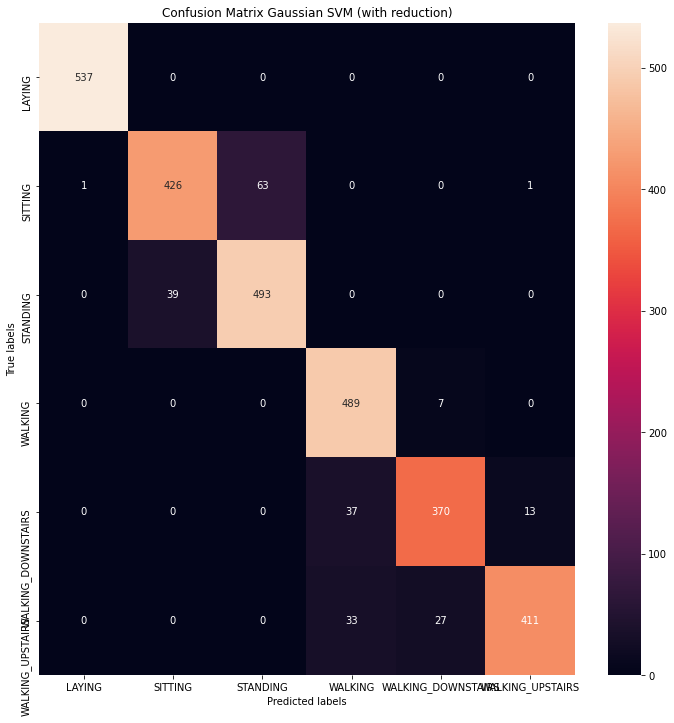

In [59]:
# Gaussian SVM (with reduction)
cm=confusion_matrix(y_test,pred4)
ax=plt.figure(figsize=(12,12))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Gaussian SVM (with reduction)'); 
ax.xaxis.set_ticklabels(le.classes_); ax.yaxis.set_ticklabels(le.classes_);

### Conclusion: SVM Model was giving better results with no feature reduction.